In [83]:
# install required packages. 
#%pip install numpy pandas matplotlib seaborn sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Vector Norms

### L1 Norm
The L1 norm is often referred to as the Manhattan/Taxicab Distance, the Least Absolute Shrinkage and Selection Operator (__LASSO__).

$ \| \mathbf{x} \|_{1} = \sum \limits _{i = 1} ^{N} \left\lvert x \right\rvert = \left\lvert x_{0} \right\rvert + \left\lvert x_{1} \right\rvert + . . . + \left\lvert x_{n} \right\rvert $


### L2 Norm
The L2 norm is often referred to as the Euclidean Distance, or the __Ridge__ Operator.


$ \| \mathbf{x} \|_{2} = \biggl(\sum \limits _{i = 1} ^{N} \left\lvert x \right\rvert^2\biggr)^\frac{1}{2} = \sqrt {x_{0}^2 + x_{1}^2 + . . . + x_{n}^2} $

In [2]:
'''
    L1, L2 Norms for a vector V, could be easily calculated
    using numpy as follows:
        from numpy.linalg import norm
        norm(V, ord=1) # for L1 norm (LASSO).
        norm(V, ord=2) # for L2 norm (Ridge).
'''

def l1_norm(V):
    return np.abs(V).sum()

def l2_norm(V):
    return np.sqrt( (V**2).sum() )

In [3]:
# Test
from numpy.linalg import norm

V = np.array([[1], [-3], [4]])
print(norm(V, ord=1))
print(l1_norm(V))

print(norm(V, ord=2))
print(l2_norm(V))

8.0
8
5.099019513592785
5.0990195135927845


## Linear Regression:

### Hypothesis:  &emsp;&emsp;    $ h_{\theta}(x) = \theta_{0} + \theta_{1} x_{1} + . . . + \theta_{n} x_{n} $
### Parameters:  &emsp;&emsp;    $ \theta_{0} , \theta_{1}, . . . , \theta_{n}  $
### Cost Function:  &emsp;&emsp; $ J(\theta_{0} , \theta_{1}, . . . , \theta_{n}) = \frac{1}{2m} \sum \limits _{i = 0} ^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$  
### Goal:  &emsp;&emsp;&emsp;&emsp;    __Minimize__  $ J(\theta_{0} , \theta_{1}, . . . , \theta_{n}) $
### Method: &emsp;&emsp;&emsp;  Repeat { <br/> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $ \theta_{j} := \theta_{j} - \alpha   \frac{\partial }{\partial x} J(\theta_{0}, . . . , \theta_{n}) $ <br/> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; , where $ \frac {\partial}{\partial x} J = \frac {1}{m} \sum \limits _{i = 0} ^{m} (h_{\theta}(x^{(i)}) - y^{(i)}).x^{(i)} $ <br/><br/> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;}&emsp;&emsp;&emsp;&emsp;(simultaneously update for every j = 0, . . ., n) 

In [4]:
def linear_regression(x, y, alpha=0.05, max_iters=1000, tol=0.001):
    '''
    arguments:
        x -- is the features matrix, has shape (m x n).
        y -- is the label vector, has shape (m x 1).
        , where m is the number of samples (rows).
        
        alpha -- is the learning rate.
        max_iters -- is the maximum number of iterations for the algorithm.
        tol -- is the tolerence in the cost difference, at which, conversion is considered occured.
        
    returns:
        A tuple of (theta, J, h): 
            theta -- the weights vector.
            J -- the cost function values vector.
            h -- hypothesis matrix.
    '''
    
    m, n = x.shape
    
    # initialize the theta vector as a zero vector.
    theta = np.zeros(shape=(n+1, 1))
    
    # append a vector of ones as a first column in the features matrix.
    # this ones vector is considered as a placeholder for x0 column.
    x = np.c_[np.ones(shape=(m, 1)), x]
    
    last_J = 10 * tol
    
    for i in range(max_iters):
        h = x @ theta  # shape = (m x 1)
        
        err = h - y  # shape = (m x 1)
        J = (0.5 / m) * (err.T @ err)  # scaler
        
        gd = (x.T @ err) / m  # shape = (n+1 x 1)
        theta = theta - alpha * gd  # shape = (n+1 x 1)
        
        # check conversion.
        if abs(last_J - J) <= tol:
            break
        else:
            last_J = J
            
    return theta

## Features Scaling:
- Make sure features are on similar scale.
- For gradient-based algorithms, features scaling improves the convergence speed.
- Distance-based algorithms like KNN, K-means, and SVM are most affected by the range of features. 
- Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features.

<br/>

### Min-Max Normalization (Normalization):
- It scales each feature in range [0, 1].
- This method preserves the shape of the original distribution.
- __Sensitive to outliers__.

- Method: &emsp;&emsp; $ x' = \frac{x - min(x)}{max(x) - min(x)} $

- ```python
from sklearn.preprocessing import MinMaxScaler
```

<br/>

### Mean Normalization (standardization):
- It produces a distribution centered at 0 (__mean__ = 0) with a __std__ of 1.
- This method makes a feature normally distributed.
- With outliers, the data will be scaled to a small interval.

- Method: &emsp;&emsp; $ x' = \frac{x - \bar x}{\sigma} $
- ```python
from sklearn.preprocessing import StandardScaler
```


<br/>

### Robust Scaling
- All distributions have most of their densities around 0 and a shape that is more or less the same.
- The Interquartile range makes this method __robust to outliers__ (hence the name).

- Method &emsp;&emsp; $ x' = \frac{x - Q_{1}(x)}{Q_{3}(x) - Q_{1}(x)} $
- ```python
from sklearn.preprocessing import RobustScaler
```


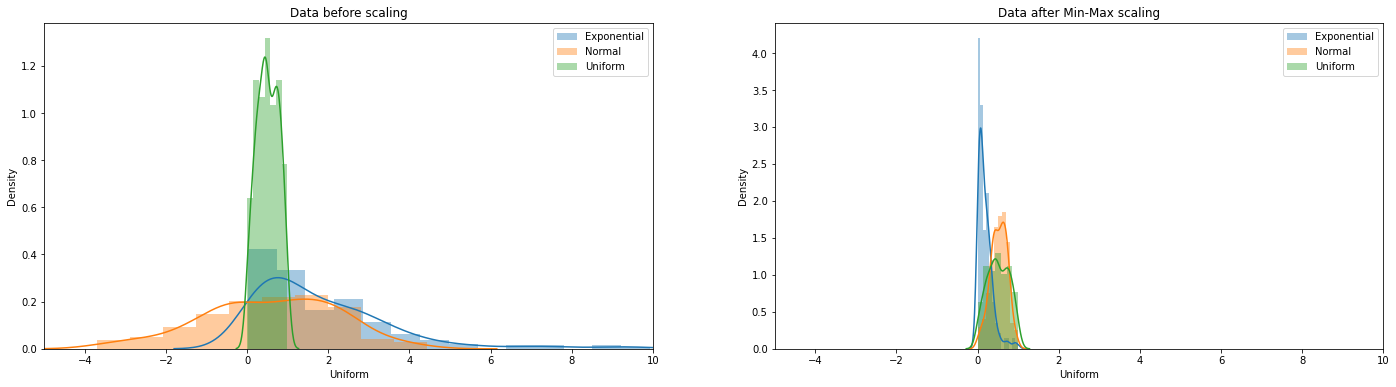

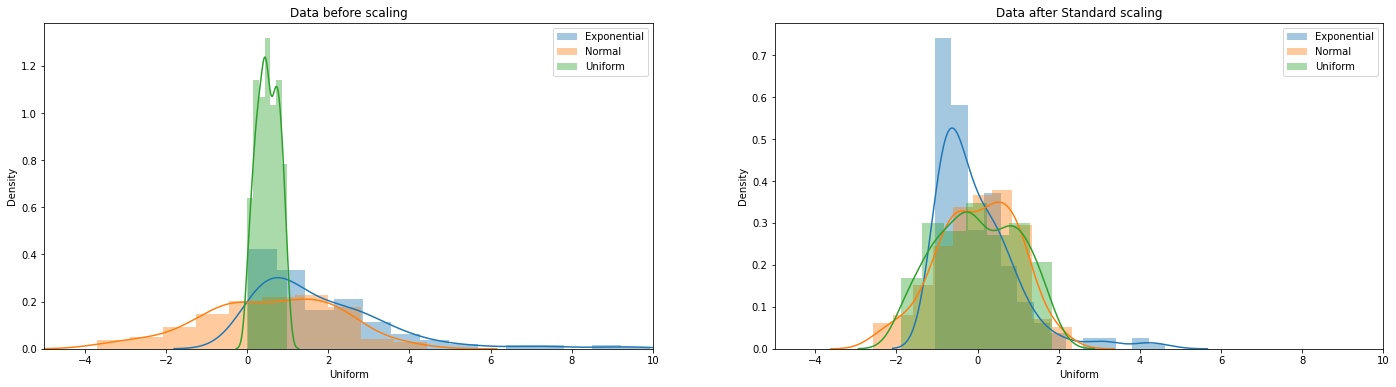

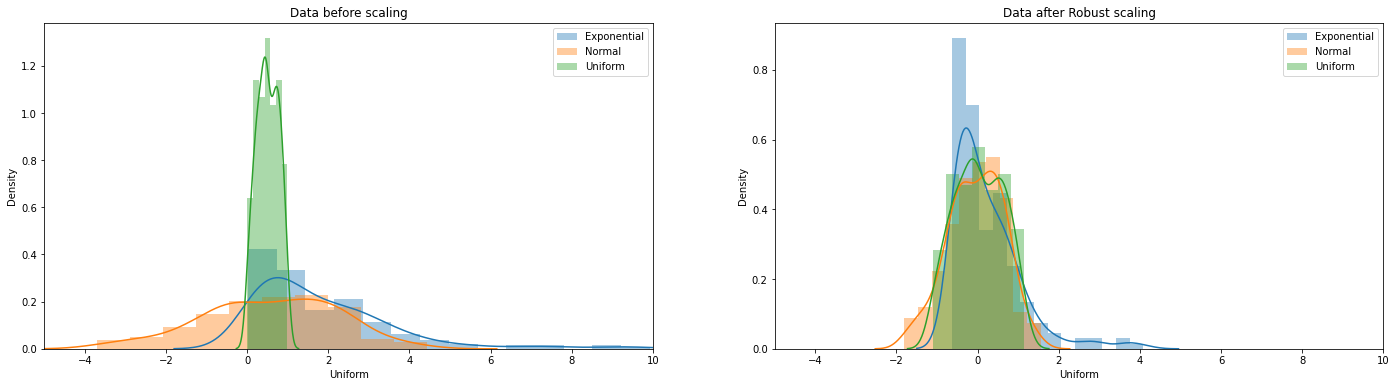

In [81]:
# showcase
from numpy.random import exponential, normal, uniform
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


data = pd.DataFrame({
     'Exponential': exponential(scale=2, size=200),
     'Normal': normal(loc=0.5, scale=1.5, size=200),
     'Uniform': uniform(low=0, high=1, size=200),
    })


def plot_dist(data, scaled_data, scaling_method):
    fig, axs = plt.subplots(1, 2, figsize=(24, 6))
    
    axs[0].set_title('Data before scaling')
    axs[0].set(xlim=(-5, 10))
    for col in data.columns:
        sns.distplot(data[col], ax=axs[0], label=col)
    axs[0].legend()
    
    axs[1].set_title(f'Data after {scaling_method} scaling')
    axs[1].set(xlim=(-5, 10))
    for col in scaled_data.columns:
        sns.distplot(scaled_data[col], ax=axs[1], label=col)
    axs[1].legend()
    
    plt.show()

    
def get_scaled_df(df, scaler):
    return pd.DataFrame(
        data=scaler.fit_transform(df.values),
        columns=df.columns,
        index=df.index,
    )
    
    
mm_scaled_data = get_scaled_df(data, MinMaxScaler())
plot_dist(data,  mm_scaled_data , scaling_method="Min-Max")

std_scaled_data = get_scaled_df(data, StandardScaler())
plot_dist(data, std_scaled_data, scaling_method="Standard")

robust_scaled_data = get_scaled_df(data, RobustScaler())
plot_dist(data, robust_scaled_data, scaling_method="Robust")


## Batch Dradient Descent:

### The main advantages:
- We can use __fixed learning rate__ during training without worrying about learning rate
    decay.
- It is __guaranteed to converge__ in theory to the __global minimum__ if the loss function is __convex__ \
    and to a __local minimum__ if the loss function is __not convex__.
- It has __unbiased__ estimate of gradients. The more the examples, the lower the standard
    error.

### The main disadvantages:
- It __may be slow__ to go over all examples especially when we have large datasets.
- Each step of learning happens after going over all examples where some examples may
    be __redundant__ and don’t contribute much to the update.